In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.special import erf
from scipy.optimize import fsolve
import math
import scipy.stats as sts

(5 pt.) Import that file into a pandas dataframe. Call the dataframe df_raw.

In [2]:
df_raw = pd.read_csv("RDC_Inventory_Core_Metrics_Zip.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3. (5 pt.) Display the first 5 rows of the dataframe.

In [3]:
df_raw.head(5)

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202302,97754,"prineville, or",458748.0,-0.0254,-0.1061,105.0,0.0048,1.0792,102.0,...,541867.0,-0.0382,-0.1571,135.0,-0.0288,0.2273,0.2952,-0.0349,-0.9226,1.0
1,202302,60064,"north chicago, il",178987.0,0.0378,0.2792,10.0,-0.3939,-0.0476,80.0,...,174225.0,-0.0087,0.1925,31.0,-0.0758,0.0517,2.0000,1.0606,0.2857,0.0
2,202302,68413,"nehawka, ne",184975.0,-0.4308,NaN,2.0,0.5000,NaN,19.0,...,184975.0,-0.4308,NaN,3.0,0.5000,0.5000,1.0000,0.0000,NaN,0.0
3,202302,13402,"madison, ny",170000.0,0.0000,NaN,1.0,-0.5000,NaN,87.0,...,170000.0,0.0000,NaN,1.0,-0.5000,0.0000,2.0000,1.0000,NaN,0.0
4,202302,87710,"angel fire, nm",599000.0,-0.0622,-0.0481,56.0,-0.0177,0.5000,176.0,...,777226.0,0.0631,-0.1291,78.0,0.0839,0.0764,0.4144,0.1312,-0.5721,0.0


4. (5 pt.) Display the last 20 rows of the dataframe.

In [4]:
df_raw.tail(20)

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
27051,202302,62627,"chandlerville, il",25000.0,-0.6549,0.1123,1.0,-0.5000,0.0000,574.0,...,25000.0,-0.6549,0.1123,2.0,0.0000,1.0000,1.0000,NaN,NaN,1.0
27052,202302,4238,"hebron, me",450000.0,-0.0481,0.0331,1.0,0.0000,-0.5000,10.0,...,450000.0,-0.0481,-0.0032,2.0,0.5000,-0.2500,1.0000,NaN,NaN,1.0
27053,202302,50624,"dike, ia",215000.0,0.0000,NaN,1.0,0.0000,NaN,150.0,...,215000.0,0.0000,NaN,1.0,-0.3333,NaN,1.0000,0.0000,NaN,0.0
27054,202302,56218,"boyd, mn",279900.0,-0.0667,2.3521,1.0,0.0000,0.0000,50.0,...,279900.0,-0.0667,2.3521,1.0,0.0000,0.0000,1.0000,NaN,NaN,1.0
27055,202302,62284,"smithboro, il",77000.0,0.0000,NaN,1.0,0.0000,NaN,144.0,...,77000.0,0.0000,NaN,1.0,0.0000,NaN,1.0000,NaN,NaN,0.0
27056,202302,64482,"rock port, mo",102500.0,-0.5728,-0.4345,6.0,0.5000,0.7143,40.0,...,182233.0,-0.2418,-0.1833,6.0,0.0909,0.7143,0.1667,-0.2083,NaN,1.0
27057,202302,39854,"georgetown, ga",249700.0,0.0409,-0.2956,8.0,0.1429,0.6000,117.0,...,333725.0,-0.0318,-0.2430,9.0,0.0625,0.7000,0.1250,-0.0179,NaN,1.0
27058,202302,50062,"melcher dallas, ia",138100.0,-0.0620,-0.4442,4.0,-0.1250,0.7500,53.0,...,197675.0,-0.1288,-0.2044,6.0,0.2000,2.0000,0.8571,0.3571,NaN,1.0
27059,202302,62466,"sumner, il",224900.0,-0.2249,-0.0895,1.0,-0.5000,-0.7500,164.0,...,224900.0,-0.2249,-0.0392,1.0,-0.6667,-0.7500,0.5000,0.0000,NaN,1.0
27060,202302,24957,"maxwelton, wv",399500.0,0.0000,NaN,2.0,-0.2500,NaN,111.0,...,399500.0,0.0000,NaN,2.0,-0.2500,NaN,0.6667,0.1667,NaN,0.0


5. (5 pt.) Using a built-in function, determine how many records are there in the database.

In [5]:
len(df_raw)

27071

6. (10 pt.) The database contains much more columns than we need. Create a new dataframe df, which contains only the following three columns of the original dataframe df_raw: 'postal_code', 'median_square_feet', 'median_listing_price'.

In [6]:
df = pd.DataFrame(df_raw['postal_code'])
df['median_listing_price'] = df_raw['median_listing_price']
df['median_square_feet'] = df_raw['median_square_feet']

7. (5 pt.) Display the last 5 rows of the dataframe df.

In [7]:
df.head(5)

,postal_code,median_listing_price,median_square_feet
0,97754,458748.0,1835.0
1,60064,178987.0,1334.0
2,68413,184975.0,1123.0
3,13402,170000.0,1790.0
4,87710,599000.0,1925.0


8. (20 pt.) As opposed to the data files we are accustomed to deal with in physics, these "real-life" databases often contain garbage. Google how to use function Pandas function dropna(). Using the function, remove all the rows containing garbage cells data from the dataframe.

In [8]:
df = df.dropna(subset=['median_square_feet'], how='any', axis=0, thresh=None)
df = df.dropna(subset=['median_listing_price'], how='any', axis=0, thresh=None)
df = df.dropna(subset=['postal_code'], how='any', axis=0, thresh=None)

(5 pt.) Using a built-in function, determine how many records are there in the cleaned database. Did the number of records change? Add your comments in the Jupyter notebook.

In [9]:
len(df)

26760

In [10]:
# the number of recoreds decreased

10. (5 pt. ) When you were importing the csv file, one of the things Pandas did behind the scenes was to infer the type of data for each column. Sometimes Pandas guesses correctly, sometimes not. Change the type of the 'postal_code' to integer, and the type of the columns 'median_square_feet', 'median_listing_price' to float.

In [11]:
df['postal_code'] = df['postal_code'].astype('int')
df['median_listing_price'] = df_raw['median_listing_price'].astype('float')
df['median_square_feet'] = df_raw['median_square_feet'].astype('float')

In [12]:
df.dtypes

postal_code               int32
median_listing_price    float64
median_square_feet      float64
dtype: object

11. (15 pt. ) Add a new column to df. Call it 'price_per_sqft'. The column should contain the result of the division of 'median_listing_price' by 'median_square_feet'.

In [13]:
df['price_per_sqft'] = df['median_listing_price'] / df['median_square_feet']

In [14]:
df.head()

,postal_code,median_listing_price,median_square_feet,price_per_sqft
0,97754,458748.0,1835.0,249.998910
1,60064,178987.0,1334.0,134.173163
2,68413,184975.0,1123.0,164.715049
3,13402,170000.0,1790.0,94.972067
4,87710,599000.0,1925.0,311.168831


12. (5 pt. ) Calculate the mean price per square foot.

In [15]:
p_arr = np.array(df['price_per_sqft'])

calculate the mean

In [16]:
mu = np.mean(p_arr)
mu

228.2766938344255

#### 13 (10 pt.) Calculate the standard deviation of the price per square foot according to formula (4.9) from Taylor.

In [17]:
def my_SD(arr):
    SD = np.sqrt(np.sum((arr - np.mean(arr)) **2)/(arr.size -1))
    return SD

In [18]:
sigma = my_SD(p_arr)
sigma

259.013541373766

#### 14 (10 pt.) Using pyplot, create a bin histogram showing f_k vs the price per square foot. You might want to make several attempts to find the number of bins, the boundaries of your histogram, and the bin width which works the best.

#### 15 (5 pt.) Label the axes of your histogram.

In [45]:
my_bins = np.linspace(mu - sigma, mu + sigma, 500)
#my_bins

In [46]:
hist, bins = np.histogram(p_arr, bins = my_bins)

In [47]:
sub_bins = (bins[1:] + bins[:-1]) / 2.0
len(sub_bins)

499

Text(0,0.5,'$f_k$')

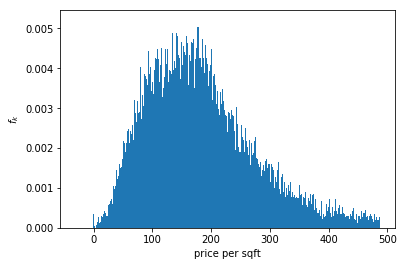

In [48]:
fig, ax = plt.subplots()
ax.bar(sub_bins, hist  / p_arr.size, width = (sub_bins[1] - sub_bins[0]))
ax.set_xlabel('price per sqft')
ax.set_ylabel('$f_k$')

#### 17 (15 pt.) Label the Gauss distribution plot with its formula. (Hint: google how to use Latex notation in pyplot labels and legends. Recall the lecture where I showed you the elements of Latex notation we would need.) 

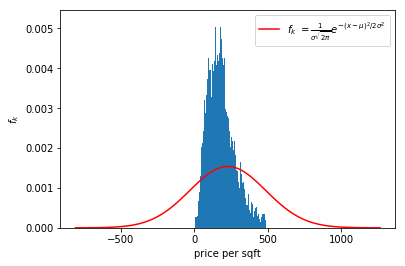

In [50]:
x_arr = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
ax.plot(x_arr, 1 / np.sqrt(2 * np.pi) / sigma * np.exp(-(mu - x_arr)**2 / 2 / sigma**2), color = 'red',
        label = r'$f_k \ = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x - \mu)^2 / {2 \sigma^2}}$ ')
legend = ax.legend()
fig

#### 18 (5 pt.) Is the current housing market in the U.S. normal? In other words, does the Gaussian distribution do a good job as a limiting distribution for the price per square foot data? Add comments to the Jupyter notebook with your thoughts.

No, it is not. The distribution function and the histogram have distinctly different shapes

#### 19 (30 pt.) Let's assume for a minute that our data does have Gaussian distribution. Apply chauvenet_reject(x_sus, x_mean, sigma, N) function and, using the Boolean indexing capability of Pandas (or numpy - your choice)  we learned in class, find all zip codes in the U.S. that shouldn't exist according to Chauvenet's criterion. How many did you find? Are prices there higher or lower than the medium? Share your thoughts about your findings as comments in the Jupyter notebook.

In [55]:
def chauvenet_reject(x_sus, x_mean, sigma, N):
    t = abs(x_sus - x_mean) / sigma
    check = N * (1- erf(t / np.sqrt(2)))
    retVal = 'error'
    if check < 0.5:
        retVal = True
    elif check >= 0.5:
        retVal = False
    else: retVal = 'error'
    return retVal

In [56]:
vec_chauvenet_reject = np.vectorize(chauvenet_reject)

In [57]:
arr_bool_reject = vec_chauvenet_reject(p_arr, mu, sigma, len(p_arr))

In [58]:
arr_bool_reject

array([False, False, False, ..., False, False, False])

In [59]:
arr_rejected_prices = p_arr[arr_bool_reject]

In [61]:
len(arr_rejected_prices)

162

In [63]:
N_higher = len(arr_rejected_prices[(arr_rejected_prices) > mu])
N_higher

162

In [64]:
N_lower = len(arr_rejected_prices[(arr_rejected_prices) < mu])
N_lower

0

all rejected prices were *higher*. Non were lower.

#### 20. (20 pt.) Use t_erf(x) in conjunction with fsolve() from scipy.optimize to find the border price per square foot such, that the zip codes with the price higher than that shouldn't exist, according to Chauvenet's criterion.

In [67]:
def t_erf(t):
    return erf(t/np.sqrt(2))

In [68]:
def func(x, N):    
    return t_erf(x) - (N - 0.5) / N
def f(x):
    return func(x, p_arr.size)

In [72]:
sol = fsolve(f, 2.0)
chauv_high_bord = sol[0] * sigma + mu
chauv_high_bord

1336.8692340881244

#### 21. (5 pt.) Use t_erf(x) in conjunction with fsolve() from scipy.optimize to find the lower border of the price per square foot such, that the zip codes lower than that shouldn't exist, according to Chauvenet's criterion.

What is the probability for a Netflix original to have an IMBD score laying outside the range mean - 3.1 * sigma < IMBD score < mean + 3.1 * sigma  ?

In [73]:
chauv_low_bord = - sol[0]* sigma + mu
chauv_low_bord

-880.3158464192734

#### 22. (15 pt.) Using the Boolean indexing capability, remove from df ALL the records that shouldn't exist according to Chauvenet's criterion.

In [84]:
arr_bool_leave = np.logical_not(arr_bool_reject)

In [86]:
df_filtered = df[arr_bool_leave]

In [88]:
df_filtered.tail()

,postal_code,median_listing_price,median_square_feet,price_per_sqft
27065,87935,368450.0,2455.0,150.081466
27066,50435,119000.0,1008.0,118.055556
27067,32147,294900.0,1545.0,190.873786
27068,58424,92000.0,1520.0,60.526316
27069,72947,66125.0,1789.0,36.961990


#### 23. (5 pt. ) How many rows are left in df?

In [89]:
len(df_filtered)

26598

#### 24. For the refreshed data without the outliers, repeat steps 12 - 18 above: calculate new values of the mean, and standard deviation, plot a new histogram, add the new Gaussian approximation, label the axes, and add the legend. Does the Gaussian approximation describe the data better now? Add your thoughts as comments in the Jupyter notebook. Do all the remaining steps below only with the refreshed data without the outliers.

In [90]:
pf_arr = np.array(df_filtered['price_per_sqft'])

In [91]:
muf = np.mean(pf_arr)
muf

216.85676518710213

In [92]:
sigmaf = my_SD(pf_arr)
sigmaf

164.27700582381408

In [233]:
prob_outside = 1 - t_erf(2.2)
prob_outside

0.02780689502699718

In [93]:
my_fbins = np.linspace(muf - sigmaf, muf + sigmaf, 500)
histf, binsf = np.histogram(pf_arr, bins = my_fbins)
sub_binsf = (binsf[1:] + binsf[:-1]) / 2.0

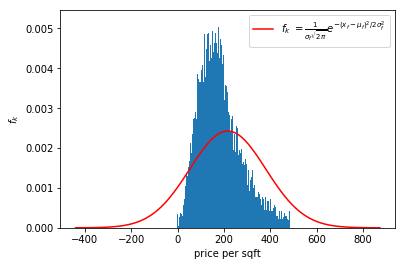

In [96]:
figf, axf = plt.subplots()
axf.bar(sub_bins, hist  / p_arr.size, width = (sub_bins[1] - sub_bins[0]))
axf.set_xlabel('price per sqft')
axf.set_ylabel('$f_k$')
x_arrf = np.linspace(muf - 4 * sigmaf, muf + 4 * sigmaf, 100)
axf.plot(x_arrf, 1 / np.sqrt(2 * np.pi) / sigmaf * np.exp(-(muf - x_arrf)**2 / 2 / sigmaf**2), color = 'red',
        label = r'$f_k \ = \frac{1}{\sigma_f \sqrt{2 \pi}} e^{-(x_f - \mu_f)^2 / {2 \sigma_f^2}}$ ')
legend = axf.legend()

#### 25. Using t_erf() function, calculate the probability for a zip code to have the average housing price per square foot outside the range  \left( X-2.3 \sigma, X + 2.3 \sigma \right) .

In [97]:
prob_outside = 1 - t_erf(2.3)
prob_outside

0.021448220043351673

#### 26. (10 pt.) How many zip codes in our database should theoretically correspond to this probability?

In [98]:
int(pf_arr.size * prob_outside)

570

#### 27. (15 pt.) Using the Boolean indexing capability of Pandas (or numpy - your choice)  we learned in class, find all zip codes from the database with the average price per foot outside the range above. Save the records with these zip codes in a separate dataframe and display it.

In [100]:
dff_outside = df[(df['price_per_sqft'] > 2.3 * sigmaf + mu) | (df['price_per_sqft'] < mu - 2.3 * sigmaf)]
dff_outside.head()

,postal_code,median_listing_price,median_square_feet,price_per_sqft
9,96703,3300000.0,2880.0,1145.833333
13,98008,1620000.0,2298.0,704.960836
26,95054,1536900.0,1941.0,791.808346
54,64146,6229950.0,3440.0,1811.031977
91,89451,2411250.0,2404.0,1003.015807


#### 28. (10 pt.) How many records are there in that dataframe? Does this number differ from the theoretical one you calculated before? Why? (Why not?) Add comments with your thoughts to the Jupyter notebook.

In [101]:
len(dff_outside)

1154

as we have seen above, the even the filtered distribution still doesn't look Gaussian, so we shouldn't expect the theoretical predictions given for the Gaussian distribution be confirmed.